In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline
from collections import defaultdict

# for plotting
import plotly
plotly.tools.set_credentials_file(username="majidpy", api_key="rW7nc9CHax4Z6NugEDvT")
import plotly.graph_objs as go
import plotly.plotly as py
plotly.offline.init_notebook_mode(connected=True)

In [2]:
"""
Plotting some sample images
"""

'\nPlotting some sample images\n'

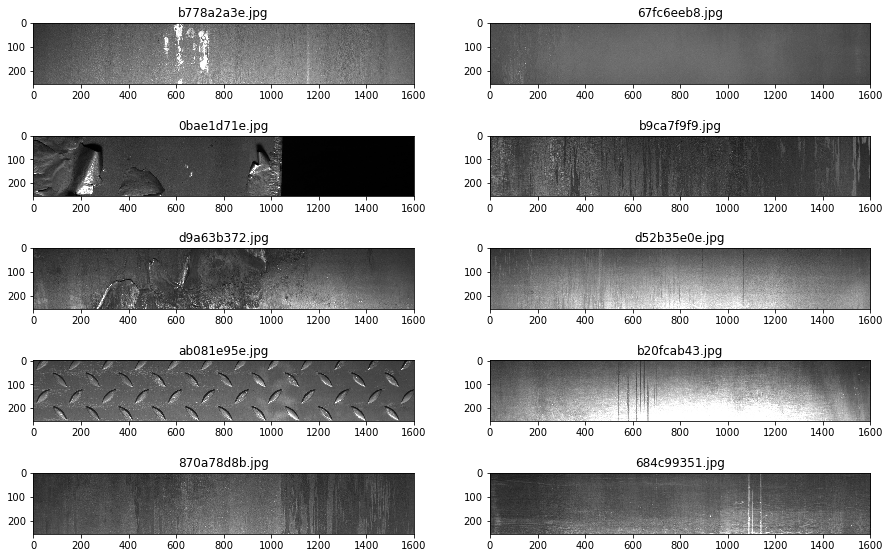

In [3]:
img_list = os.listdir('./train_image')
fig = plt.figure(figsize=(15,10))
fig.patch.set_facecolor('xkcd:white')
np.random.seed(42)
for (i, j) in zip(np.random.randint(0, len(img_list), size=10), range(10)) :
    img = plt.imread('./train_image/'+ img_list[i])
    a = fig.add_subplot(5, 2, j+1)
    plt.imshow(img)
    a.set_title(img_list[i])

In [4]:
"""
Defects in sample images? Since there are 4 types of defects, we will seperate them. 
It makes sense to seperate these defects and train them seperately.
"""

'\nDefects in sample images? Since there are 4 types of defects, we will seperate them. \nIt makes sense to seperate these defects and train them seperately.\n'

In [2]:
train_pd = pd.read_csv('train.csv')
imageid = [t[:-2] for t in train_pd['ImageId_ClassId'].values]
classid = [int(t[-1:]) for t in train_pd['ImageId_ClassId'].values]
train_pd['ImageId'] = imageid
train_pd['ClassId'] = classid
train_pd.drop(columns='ImageId_ClassId', inplace=True)

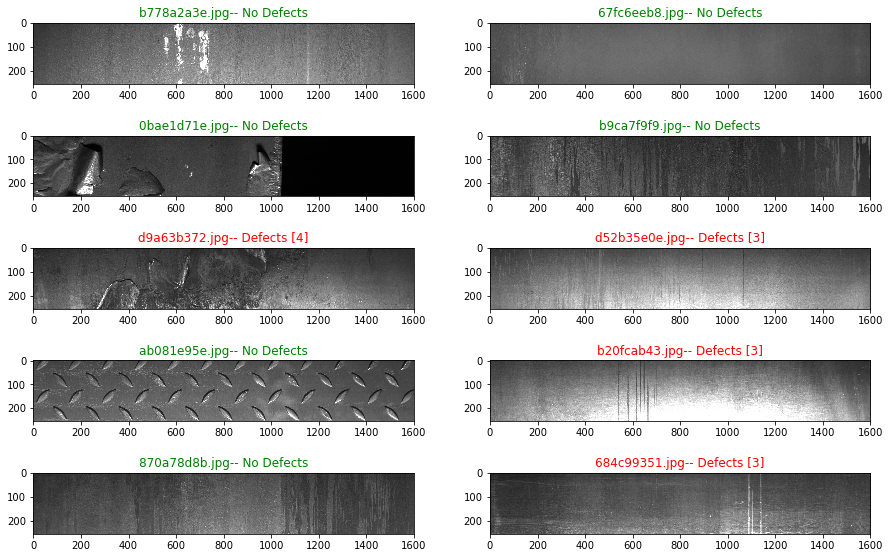

In [6]:
fig = plt.figure(figsize=(15,10))
fig.patch.set_facecolor('xkcd:white')
np.random.seed(42)
for (i, j) in zip(np.random.randint(0, len(img_list), size=10), range(10)) :
    img = plt.imread('./train_image/'+ img_list[i])
    a = fig.add_subplot(5, 2, j+1)
    plt.imshow(img)
    temp_ = train_pd.loc[train_pd['ImageId']==img_list[i]][['EncodedPixels', 'ClassId']].dropna()
    if temp_.shape[0]==0:
        a.set_title(img_list[i]+'-- No Defects', color='Green')
    else:
        defects = temp_['ClassId'].values
        a.set_title(img_list[i]+'-- Defects {}'.format(defects), color='Red')

In [7]:
"""
How many of each defects fo we have in the train set?
"""
temp_ = train_pd.dropna()
temp_.groupby('ClassId').count()

,EncodedPixels,ImageId
ClassId,,
1,897,897
2,247,247
3,5150,5150
4,801,801


In [8]:
"""
Image sizes: all the images for train and test set are same size. 
"""
from collections import defaultdict #enables to create key and values when it sees at first
train_size = defaultdict(int)
for img in train_pd['ImageId'].unique():
    temp_ = plt.imread('./train_image/'+ img)
    train_size[temp_.shape] += 1
print(train_size)

defaultdict(<class 'int'>, {(256, 1600, 3): 12568})


In [9]:
image_list = os.listdir('./test_image')
test_size = defaultdict(int)
for img in image_list:
    temp_ = plt.imread('./test_image/'+ img)
    test_size[temp_.shape] += 1
print(test_size)

defaultdict(<class 'int'>, {(256, 1600, 3): 1801})


In [3]:
mask_pd = train_pd.dropna()

In [4]:
"""
Making masks
"""
def make_mask(enc_pxl):
    enc_pxl_list = enc_pxl.split(' ')
    pxl = map(int, enc_pxl_list[0::2])
    lng = map(int, enc_pxl_list[1::2])
    mask = np.zeros(shape=256*1600)
    for p, l in zip(pxl, lng):
        mask[p-1:p+l-1] = 1
    return np.reshape(mask, [256,1600], order='F')

In [5]:
mask_pd['Mask'] = mask_pd['EncodedPixels'].apply(lambda x: make_mask(x))

/home/majid/applications/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [6]:
mask_pd.head()

,EncodedPixels,ImageId,ClassId,Mask
0,29102 12 29346 24 29602 24 29858 24 30114 24 3...,0002cc93b.jpg,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
18,18661 28 18863 82 19091 110 19347 110 19603 11...,0007a71bf.jpg,3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
20,37607 3 37858 8 38108 14 38359 20 38610 25 388...,000a4bcdd.jpg,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
27,131973 1 132228 4 132483 6 132738 8 132993 11 ...,000f6bf48.jpg,4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
30,229501 11 229741 33 229981 55 230221 77 230468...,0014fce06.jpg,3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


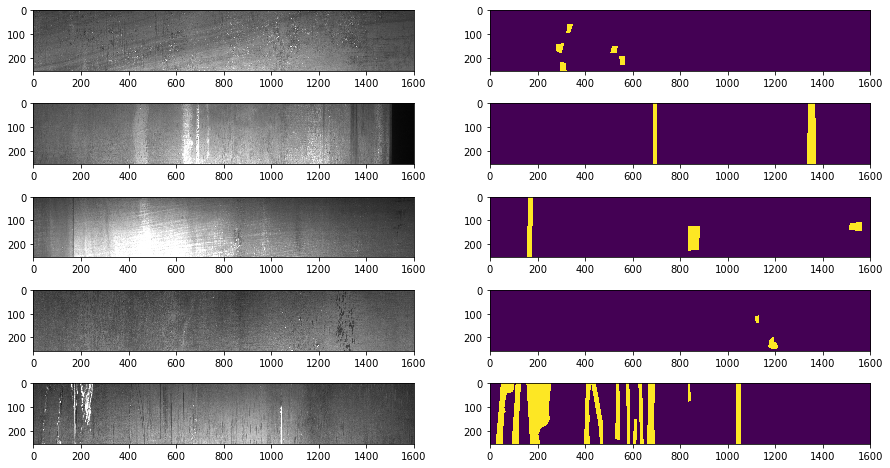

In [14]:
"""
Plotting some images with their defects
"""
fig = plt.figure(figsize=(15,10))
fig.patch.set_facecolor('xkcd:white')
np.random.seed(42)
for (i, j) in zip(np.random.randint(0, mask_pd.shape[0], size=5), range(5)) :
    img = plt.imread('./train_image/'+ mask_pd.iloc[i]['ImageId'])
    fig.add_subplot(6, 2, 2*j+1)
    plt.imshow(img)
    fig.add_subplot(6, 2, 2*j+2)
    plt.imshow(mask_pd.iloc[i]['Mask'])

In [7]:
"""
Let's first train a clasification network to whether an image has defect or not
"""

train_pd['Encoded'] = ~ train_pd['EncodedPixels'].isna()
train_pd_cls = train_pd.groupby(['ImageId']).aggregate({'Encoded': sum}).reset_index()
train_pd_cls.head()

,ImageId,Encoded
0,0002cc93b.jpg,1.0
1,00031f466.jpg,0.0
2,000418bfc.jpg,0.0
3,000789191.jpg,0.0
4,0007a71bf.jpg,1.0


In [8]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import Image

/home/majid/applications/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

Using TensorFlow backend.


In [112]:
"""
Testing to see what Keras ImageDataGenerator does
"""
def create_batch(imggen, image):
    
    image = np.reshape(image, (1,)+image.shape)
    fig = plt.figure(figsize=(15,10))
    fig.patch.set_facecolor('xkcd:white')
    a = fig.add_subplot(3, 3, 1)
    plt.imshow(image[0, :, :, :])
    i = 1
    for batch in imggen.flow(image, batch_size=1):
        i += 1
        a = fig.add_subplot(3, 3, i)
        plt.imshow(batch[0,:,:,:].astype('uint8'))
        if i > 8:
            break

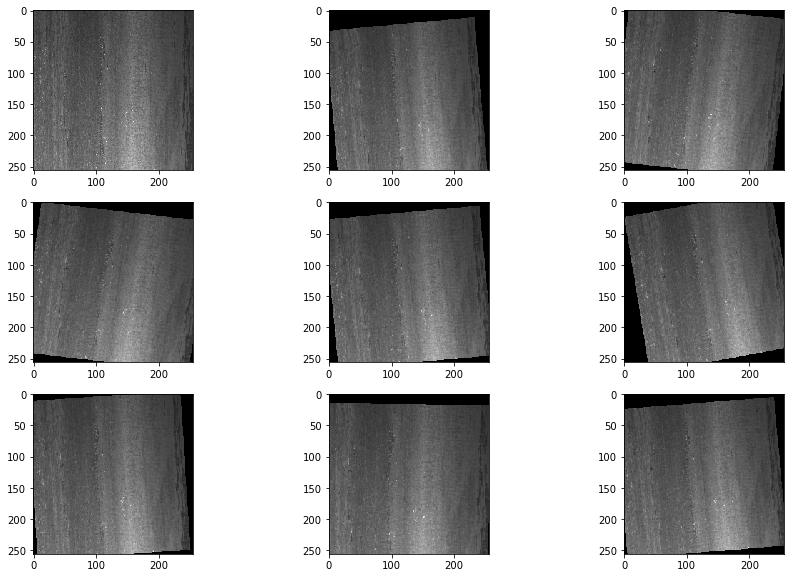

In [121]:
sample = './train_image/'+train_pd_cls.iloc[0, 0]
# img_plt = plt.imread(sample) #np array
img_pil = Image.open(sample)
sample = img_pil.resize((256, 256))
sample_np = np.array(sample.convert("RGB"))
imggen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
                            height_shift_range=0.1, zoom_range=0.1,
                           fill_mode='constant', cval=0)
batch = create_batch(imggen, sample_np)

In [ ]:
"""
Modeling
"""
data_gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1, )